![Colegio Bourbaki](./Images/Bourbaki.png)

## Procesamiento de Lenguaje Natural

### Encaje de Palabras (Word Embedding)

El encaje de palabras es una técnica de modelado lingüístico que consiste en asignar palabras a vectores de números reales. Representa palabras o frases en un espacio vectorial de varias dimensiones. Los encajes de palabras pueden generarse mediante diversos métodos, como redes neuronales, matrices de co-ocurrencia, modelos probabilísticos, etc. 

**Word2Vec** consta de modelos para generar encajes de palabras. Estos modelos son redes neuronales superficiales de dos capas que tienen una capa de entrada, una capa oculta y una capa de salida.

### Word2Vec

Word2Vec es un método ampliamente utilizado en el procesamiento del lenguaje natural (PLN) que permite representar las palabras como vectores en un espacio vectorial continuo. Word2Vec es un esfuerzo por asignar palabras a vectores de alta dimensión para capturar las relaciones semánticas entre palabras, desarrollado por investigadores de Google. Las palabras con significados similares deben tener representaciones vectoriales similares, según el principio fundamental de Word2Vec. 

Word2Vec utiliza dos arquitecturas:

* **CBOW (Continuous Bag of Words):** El modelo CBOW predice la palabra actual a partir de palabras contextuales dentro de una ventana específica. La capa de entrada contiene las palabras contextuales y la capa de salida contiene la palabra actual. La capa oculta contiene las dimensiones que queremos que representen la palabra actual presente en la capa de salida.

![CBOW](./Images/cbow.png)

* **Skip-Gram:** Skip Gram predice las palabras contextuales circundantes dentro de una ventana específica dada la palabra actual. La capa de entrada contiene la palabra actual y la capa de salida contiene las palabras contextuales. La capa oculta contiene el número de dimensiones en las que queremos representar la palabra actual presente en la capa de entrada.

![SkipGram](./Images/skip_gram.png)

### Librerias

La idea básica del encaje de palabras es que las palabras que aparecen en un contexto similar tienden a estar más cerca unas de otras en el espacio vectorial. 

Para generar vectores de palabras en Python, los módulos necesarios son nltk y gensim:

* **NLTK:** NLTK (Natural Language Toolkit) es una potente biblioteca de Python para el tratamiento de datos del lenguaje humano. Ofrece interfaces fáciles de usar para más de 50 recursos léxicos y corpus, incluido WordNet. NLTK también incluye una colección de bibliotecas de procesamiento de textos para tareas de categorización, tokenización, stemming, etiquetado, análisis sintáctico y razonamiento semántico.

* **GENSIM:** Gensim es una biblioteca Python de código abierto que utiliza el modelado temático y el modelado de similitud de documentos para gestionar y analizar cantidades masivas de datos de texto no estructurados. Es especialmente conocida por aplicar algoritmos de modelado de tópicos y espacios vectoriales, como Word2Vec y Latent Dirichlet Allocation (LDA), de uso muy extendido.

In [1]:
# Data Analysis
import numpy as np
import pandas as pd                                 

# Internet Requests
import requests

# NLP
from gensim import utils
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Utils
from IPython import get_ipython
from sklearn.manifold import TSNE

### Funciones de utilidad

In [2]:
def read_book(url):
    # Make a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        try:
            # Try to get the text content
            text_content = response.text

            # Check if text_content is None
            if text_content is not None:
                # Print the first 500 characters of the text
                print(text_content[:500])
                return text_content
            else:
                print("Error: No text content retrieved.")

        except Exception as e:
            # Print an error message if there's an issue with getting the text
            print(f"Error reading content: {e}")
    else:
        # Print an error message if the request was not successful
        print(f"Failed to fetch content. Status code: {response.status_code}")

Veamos un ejemplo simple de uso de Word2Vec:

In [3]:
# Corpus de ejemplo
corpus = [
    "Word embeddings son representaciones vectoriales de palabras.",
    "Estas representaciones capturan relaciones semánticas y sintácticas.",
    "Word2Vec es un modelo popular para generar embeddings de palabras.",
    "Se puede usar para tareas como búsqueda semántica y traducción automática."
]

# Tokenización del corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Entrenamiento del modelo Word2Vec
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)

Por defecto, Word2Vec se entrena utilizando la arquitectura de bolsa continua de palabras (CBOW). Sin embargo, el algoritmo Word2Vec también admite la arquitectura Skip-gram. 

La elección entre CBOW y Skip-gram depende de su tarea específica de PLN y de las características de su conjunto de datos. CBOW tiende a ser más rápido de entrenar y funciona bien en tareas sintácticas, mientras que Skip-gram captura mejor las relaciones semánticas, especialmente para las palabras menos frecuentes.

Puede especificar la arquitectura que desea utilizar al entrenar un modelo Word2Vec estableciendo el parámetro sg (skip-gram) en 0 (CBOW) o 1 (Skip-gram) en la clase Word2Vec de Gensim

In [4]:
#Construcción de un dataframe con los vectores de las palabras elegidas
words = model.wv.index_to_key
vectors = {word: model.wv[word] for word in words}
X = pd.DataFrame.from_dict(vectors, orient='index')

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
.,-0.001075,0.000477,0.010194,0.018016,-0.018592,-0.014234,0.012912,0.017942,-0.010015,-0.007525,...,-0.019206,0.010020,-0.017510,-0.008773,-0.000062,-0.000588,-0.015317,0.019227,0.009974,0.018455
embeddings,-0.016316,0.008992,-0.008274,0.001649,0.016997,-0.008924,0.009035,-0.013574,-0.007097,0.018797,...,0.003263,0.000380,0.006947,0.000436,0.019238,0.010121,-0.017835,-0.014083,0.001803,0.012785
representaciones,-0.017239,0.007331,0.010380,0.011484,0.014934,-0.012335,0.002211,0.012095,-0.005680,-0.012347,...,0.015796,-0.013979,-0.018312,-0.000712,-0.006200,0.015789,0.011877,-0.003091,0.003022,0.003580
de,0.015635,-0.019020,-0.000411,0.006938,-0.001878,0.016764,0.018022,0.013073,-0.001423,0.015421,...,0.002175,-0.003152,0.004393,-0.015763,-0.005434,0.005326,0.010693,-0.004783,-0.019020,0.009012
palabras,0.000189,0.006155,-0.013625,-0.002751,0.015337,0.014693,-0.007347,0.005285,-0.016634,0.012411,...,-0.011188,0.003461,-0.001795,0.013587,0.007947,0.009059,0.002869,-0.005400,-0.008734,-0.002064
para,0.002865,-0.005286,-0.014151,-0.015617,-0.018243,-0.011885,-0.003705,-0.008637,-0.012903,-0.007447,...,-0.009016,0.011412,0.018363,-0.008197,0.015943,0.010751,0.011765,0.001030,0.016444,-0.014040
y,-0.016489,0.018617,-0.000389,-0.003945,0.009216,-0.008218,0.005462,0.013868,0.012155,-0.015042,...,0.006860,0.010334,0.012581,-0.005603,0.014671,0.005655,0.005754,-0.004742,-0.006227,-0.004748
automática,0.008541,0.000157,-0.019162,-0.019334,-0.012308,-0.000268,0.003989,0.018872,0.011169,-0.008592,...,-0.014851,-0.002129,-0.001596,-0.005130,0.019368,-0.000920,0.011751,-0.014889,-0.005004,-0.011100
sintácticas,-0.014278,0.002482,-0.014353,-0.004489,0.007439,0.011666,0.002396,0.004205,-0.008221,0.014451,...,0.003564,-0.013658,-0.019450,0.018081,0.012396,-0.013826,0.006807,0.000412,0.009507,-0.014240
son,0.008054,0.008695,0.019918,-0.008942,-0.002784,-0.014639,-0.019392,-0.018155,-0.002049,-0.013009,...,0.006268,-0.009423,0.010556,-0.008470,0.005284,-0.016092,0.012415,0.009644,0.001577,0.006032


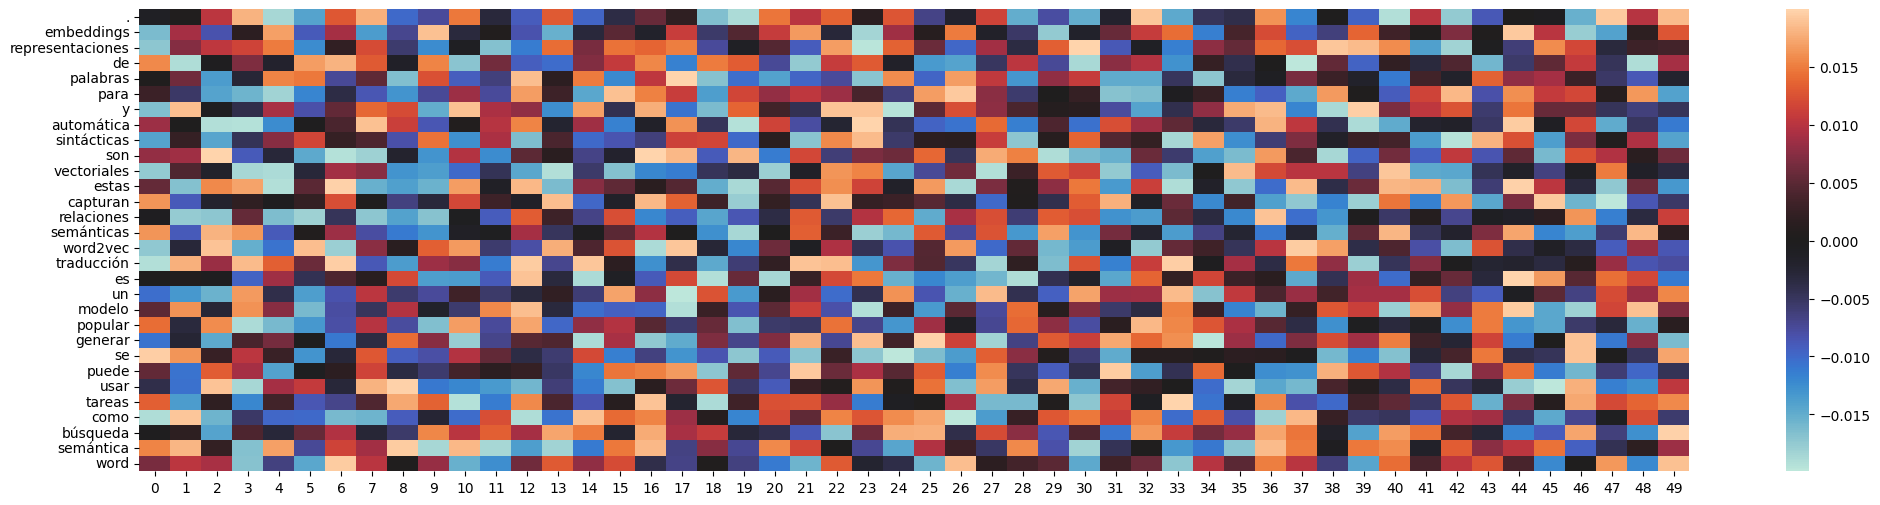

In [6]:
#Visualización de los vectores de las palabas elegidas
fig = plt.figure(figsize = (25, 6))
ax = sns.heatmap(X, center = 0)

Vamos a imprimir las 10 primeras palabras del vocabulario:

In [7]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/30 is .
word #1/30 is embeddings
word #2/30 is representaciones
word #3/30 is de
word #4/30 is palabras
word #5/30 is para
word #6/30 is y
word #7/30 is automática
word #8/30 is sintácticas
word #9/30 is son


Vamos a chequear si una palabra aparece en el modelo:

In [8]:
word = 'embeddings'
try:
   word_vector = model.wv[word]
   print(f"La palabra '{word}' aparece en el modelo")
except KeyError:
    print(f"La palabra '{word}' no aparece en este modelo")

La palabra 'embeddings' aparece en el modelo


In [9]:
word = 'Bourbaki'
try:
   word_vector = model.wv[word]
   print(f"La palabra '{word}' aparece en el modelo")
except KeyError:
    print(f"La palabra '{word}' no aparece en este modelo")

La palabra 'Bourbaki' no aparece en este modelo


Veamos la similutud entre dos palabras:

In [10]:
pairs = [
    ('representaciones', 'palabras'),
    ('relaciones', 'semánticas'),
    ('word2vec', 'modelo'),
    ('usar', 'tareas'),
    ('búsqueda', 'semántica'),
    ('traducción', 'automática'),
]

In [11]:
#Imprimir las similitudes de cada par de palabras
for pair in pairs:
    word1, word2 = pair
    similarity = model.wv.similarity(word1, word2)
    print(f"Similitud entre '{word1}' y '{word2}': {similarity:.4f}")


Similitud entre 'representaciones' y 'palabras': 0.1656
Similitud entre 'relaciones' y 'semánticas': 0.0541
Similitud entre 'word2vec' y 'modelo': -0.1742
Similitud entre 'usar' y 'tareas': 0.0183
Similitud entre 'búsqueda' y 'semántica': -0.1432
Similitud entre 'traducción' y 'automática': -0.1755


Vamos a imprimir un top 5 de similitudes:

In [12]:
print(model.wv.most_similar(positive=['representaciones', 'palabras'], topn=5))

[('sintácticas', 0.16140851378440857), ('traducción', 0.1523689329624176), ('word2vec', 0.12033414095640182), ('búsqueda', 0.11428018659353256), ('relaciones', 0.11411673575639725)]


**Memoria**

En su núcleo, los parámetros del modelo word2vec se almacenan como matrices (arreglos NumPy). Cada matriz es **vocabulario** (controlado por el parámetro min_count) veces el tamaño del vector (el parámetro vector_size) de floats (single precision).

En la RAM se guardan tres de estas matrices (se está trabajando para reducir ese número a dos, o incluso a una). Así que si nuestra entrada contiene 100000 palabras únicas, y pedimos que la capa vector_size sea igual a 200, el modelo requerirá aprox. 100.000*200*4*3 bytes = ~229MB.

Se necesita un poco más de memoria para almacenar el árbol del vocabulario (100.000 palabras ocuparían unos pocos megabytes), pero a menos que las palabras sean cadenas extremadamente largas, la huella de memoria estará dominada por las tres matrices anteriores.

Hasta aquí trabajamos con un modelo muy simple de 30 palabras. Vamos a crear un modelo con la novela de Gustave Flaubert, 'Madame Bovary':

In [13]:
url = "https://www.gutenberg.org/cache/epub/2413/pg2413.txt"

In [14]:
book = read_book(url)

The Project Gutenberg eBook of Madame Bovary
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook


In [15]:
type(book)

str

In [16]:
class MyCorpus():
    """An iterator that yields sentences (lists of str)."""

    def __init__(self, corpus_string):
        self.corpus_string = corpus_string

    def __iter__(self):
        for line in self.corpus_string.split('\n'):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [17]:
book_processed = MyCorpus(book)

In [18]:
sentences = book_processed
model_w2v = Word2Vec(sentences=sentences, vector_size=300, workers=4, compute_loss=True)

In [19]:
# getting the training loss value
training_loss = model_w2v.get_latest_training_loss()
print(training_loss)

556914.125


Este valor de pérdida no nos dice mucho, lo mejor que podemos hacer cada vez que entrenemos un modelo Word2Vec, es comparar el valor de pérdida obtenido con algún benchmark conocido, como el de Gensim por ejemplo.

In [20]:
for index, word in enumerate(model_w2v.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model_w2v.wv.index_to_key)} is {word}")

word #0/2423 is the
word #1/2423 is of
word #2/2423 is to
word #3/2423 is and
word #4/2423 is he
word #5/2423 is in
word #6/2423 is her
word #7/2423 is she
word #8/2423 is his
word #9/2423 is was


In [21]:
word = 'madame'
try:
   word_vector = model_w2v.wv[word]
   print(f"La palabra '{word}' aparece en el modelo")
except KeyError:
    print(f"La palabra '{word}' no aparece en este modelo")

word = 'bourbaki'
try:
   word_vector = model_w2v.wv[word]
   print(f"La palabra '{word}' aparece en el modelo")
except KeyError:
    print(f"La palabra '{word}' no aparece en este modelo")

La palabra 'madame' aparece en el modelo
La palabra 'bourbaki' no aparece en este modelo


### Visualización de los encajes

Los encajes realizados por el modelo pueden visualizarse reduciendo la dimensionalidad de las palabras a 2 dimensiones mediante tSNE (o algun otro método como PCA).

Las visualizaciones pueden utilizarse para detectar tendencias semánticas y sintácticas en los datos.

Por ejemplo:

* **Semántica:** palabras como gato, perro, vaca, etc. tienden a estar cerca.

* **Sintácticas:** palabras como correr, corriendo o cortar, cortando están muy juntas.

También pueden observarse relaciones vectoriales como v_rey - v_hombre = v_reina - v_mujer.

In [22]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=42)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [23]:
##Plotting
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

In [24]:
x_vals, y_vals, labels = reduce_dimensions(model_w2v)

In [25]:
plot_function(x_vals, y_vals, labels)

El modelo utilizado para la visualización se ha entrenado con un corpus pequeño. Por ello, algunas de las relaciones pueden no ser tan claras.

Ejercicios:

1) **El modelo Word2Vec es supervisado o no supervisado? Explique**

2) Definición Básica:
¿Qué es Word2Vec y cuál es su propósito principal en procesamiento de lenguaje natural?

3) Arquitecturas:
Explica las dos arquitecturas principales en Word2Vec: Skip-Gram y CBOW. ¿En qué se diferencian y cuándo podrías preferir una sobre la otra?

4) Entrenamiento del Modelo:
Describe brevemente el proceso de entrenamiento de un modelo Word2Vec. ¿Cómo se generan los vectores de palabras durante este proceso?

5) Similitud de Palabras:
¿Cómo se determina la similitud entre palabras utilizando los vectores generados por Word2Vec?

6) Operaciones Vectoriales:
Explica el concepto de operaciones vectoriales en Word2Vec. ¿Por qué la analogía "vector('rey') - vector('hombre') + vector('mujer')" tiene sentido?

7) Tamaño del Vocabulario:
¿Cómo afecta el tamaño del vocabulario al rendimiento y la eficiencia de un modelo Word2Vec?

8) **Overfitting y Underfitting:**
**¿Qué implicaciones podría tener un modelo Word2Vec que esté sobreajustado o subajustado?**

9) Preprocesamiento de Texto:
¿Por qué es importante realizar un preprocesamiento de texto adecuado antes de entrenar un modelo Word2Vec? Menciona al menos dos técnicas comunes de preprocesamiento.

10) Evaluación del Modelo:
¿Cómo podrías evaluar la calidad de los vectores generados por un modelo Word2Vec? Menciona al menos una métrica comúnmente utilizada.

11) **Uso Práctico:**
**De ser posible, entrenar un modelo Word2Vec con un corpus más extenso. Investigar cual podrían usar (Google News, Wikipedia, etc...)**

Referencias:

* Google Code Archive: https://code.google.com/archive/p/word2vec/

* Word Embeddings using Word2Vec: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/:

* Word2Vec Tutorial: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

![Colegio Bourbaki](./Images/Matematicas.png)

![Colegio Bourbaki](./Images/Contacto.png)